# <center>Centro Universitário Facens<br/></center>
<br/>
<font size="4"><center><b>Disciplina: Processamento de imagens</b></center></font>
  
<font size="3"><center>Prof. Renato Moraes Silva</center></font>
<br/>
<br/>

# <center>Segmentação</center>

Neste notebook, iremos testar técnicas de segmentação.

Primeiro, iremos importar as principais bibliotecas.

In [1]:
import numpy as np
import cv2  
import os
import urllib.request
import matplotlib.pyplot as plt

Iremos fazer o download de algumas imagens e salvá-las na pasta figs.

In [2]:
pathFolder = 'figs/'

# verifica que a pasta existe
if not os.path.exists(pathFolder):
    # cria a pasta
    os.makedirs(pathFolder)

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Fallen_bricks.jpg/640px-Fallen_bricks.jpg'
urllib.request.urlretrieve(url, pathFolder + "img1.jpg")  

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Happy_child.jpg/640px-Happy_child.jpg'
urllib.request.urlretrieve(url, pathFolder + "img2.jpg") 

url = 'https://muthu.co/wp-content/uploads/2019/04/handwritten1.jpg'
urllib.request.urlretrieve(url, pathFolder + "img3.jpg") 

('figs/img3.jpg', <http.client.HTTPMessage at 0x7f61ae143fa0>)

Execute o código abaixo para carregar a primeira imagem. 

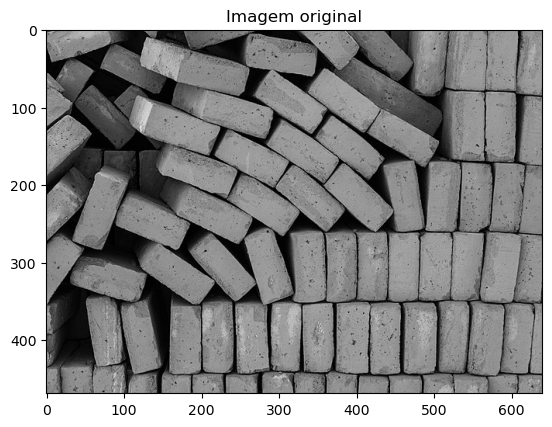

In [3]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

img = cv2.imread('figs/img1.jpg', 0)

plt.imshow(img,'gray')
plt.title('Imagem original')
plt.show()

Iremos aplicar mascará para detecção de ponto. Para isso pode ser usada a função filter2D que contém os seguintes argumentos:
- src: imagem
- ddepth: quantidade de bits em cada pixel. Use -1 para manter a mesma configuração da imagem de entrada
- kernel: a máscara 
- anchor: o pixel de origem da máscara. O padrão é (-1,-1), o que indica que a origem é o pixel central.   

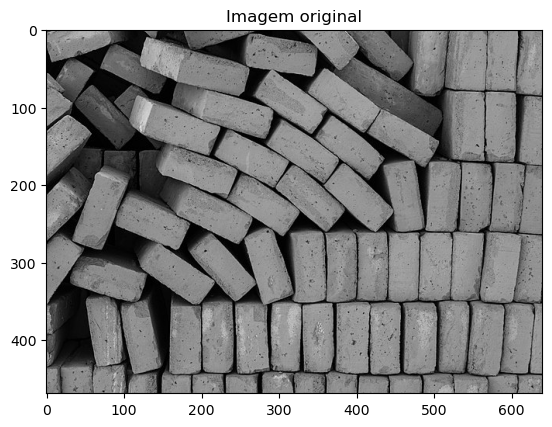

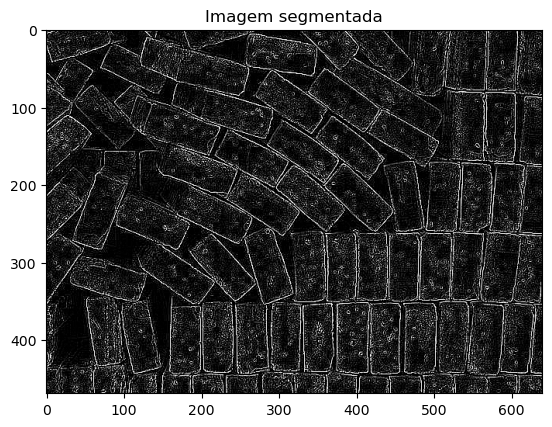

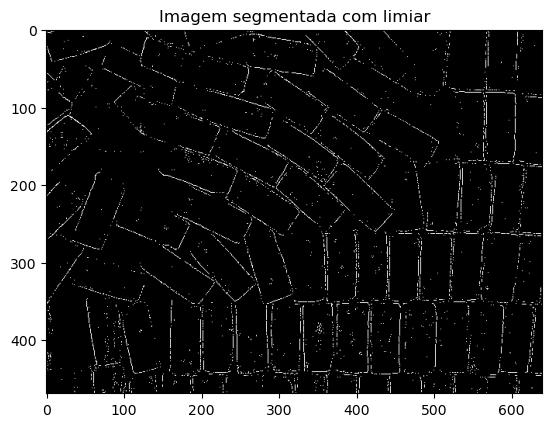

In [4]:
################# COMPLETE O CÓDIGO AQUI  #################
# Crie uma máscara de detecção de pontos
# Use a função filter2D para aplicar a máscara

kernel = np.array([
                    [-1,-1,-1],
                    [-1,8,-1],
                    [-1,-1,-1]])

img2 = cv2.filter2D(img, ddepth = -1, kernel = kernel)

# agora iremos criar uma outra imagem usando um limiar no resultado 
# da segmentação
limiar = 250
mascara1 = img2>limiar
mascara2 = img2<limiar

img3 = img2.copy()
img3[ mascara1 ] = 255
img3[ mascara2 ] = 0

plt.imshow(img,'gray', vmin=0, vmax=255)
plt.title('Imagem original')
plt.show()

plt.imshow(img2,'gray', vmin=0, vmax=255)
plt.title('Imagem segmentada')
plt.show()

plt.imshow(img3,'gray', vmin=0, vmax=255)
plt.title('Imagem segmentada com limiar')
plt.show()

Aplicando mascará para detecção de linha.

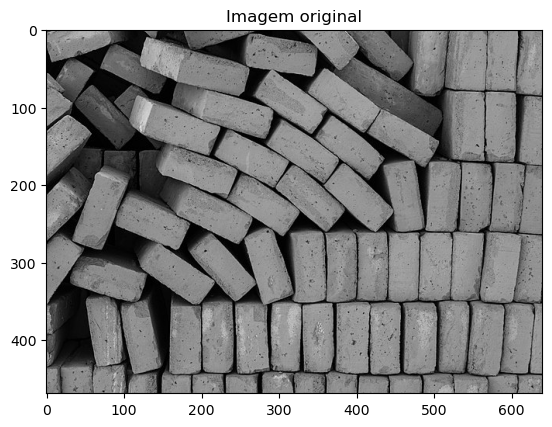

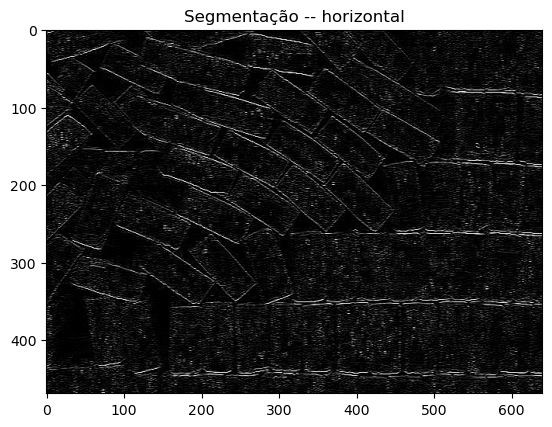

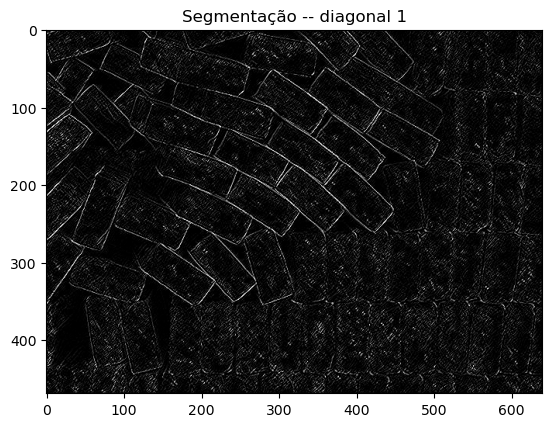

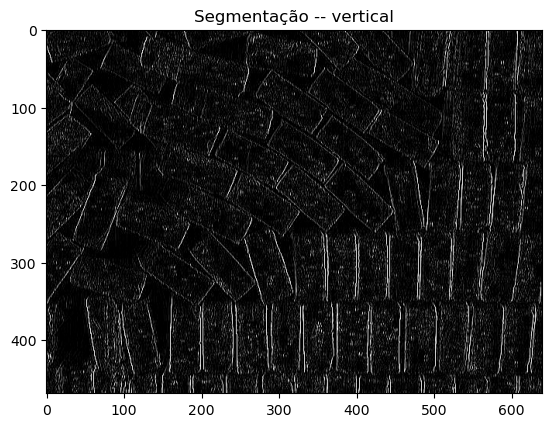

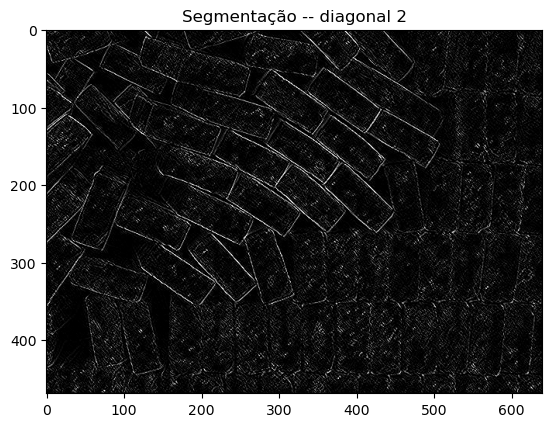

In [5]:
################# COMPLETE O CÓDIGO AQUI  #################
# Crie uma máscara de detecção de linhas, verticais, horizontais, 
# 45 graus positivos e 45 graus negativos 
# Use a função filter2D para aplicar a máscara

mascHoriz = np.array([[-1,-1,-1],
               [2,2,2],
               [-1,-1,-1]])

mascDiag1 = np.array([[-1,-1,2],
               [-1,2,-1],
               [2,-1,-1]])

mascVert = np.array([[-1,2,-1],
               [-1,2,-1],
               [-1,2,-1]])

mascDiag2 = np.array([[2,-1,-1],
               [-1,2,-1],
               [-1,-1,2]])

imgHor = cv2.filter2D(img, ddepth=-1,
                      kernel = mascHoriz)

imgDiag1 = cv2.filter2D(img, ddepth=-1,
                      kernel = mascDiag1)

imgVert= cv2.filter2D(img, ddepth=-1,
                      kernel = mascVert)

imgDiag2 = cv2.filter2D(img, ddepth=-1,
                      kernel = mascDiag2)

plt.imshow(img,'gray', vmin=0, vmax=255)
plt.title('Imagem original')
plt.show()

plt.imshow(imgHor,'gray', vmin=0, vmax=255)
plt.title('Segmentação -- horizontal')
plt.show()

plt.imshow(imgDiag1,'gray', vmin=0, vmax=255)
plt.title('Segmentação -- diagonal 1')
plt.show()

plt.imshow(imgVert,'gray', vmin=0, vmax=255)
plt.title('Segmentação -- vertical')
plt.show()

plt.imshow(imgDiag2,'gray', vmin=0, vmax=255)
plt.title('Segmentação -- diagonal 2')
plt.show()




## Operadores de Sobel

Vamos abrir uma nova imagem

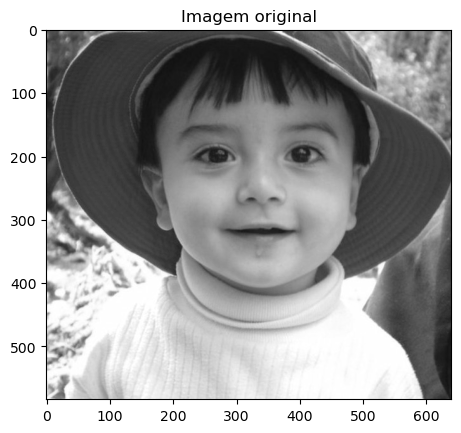

In [6]:
img = cv2.imread('figs/img2.jpg', 0)

plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.title('Imagem original')
plt.show()

Crie as máscaras e aplique o operador.

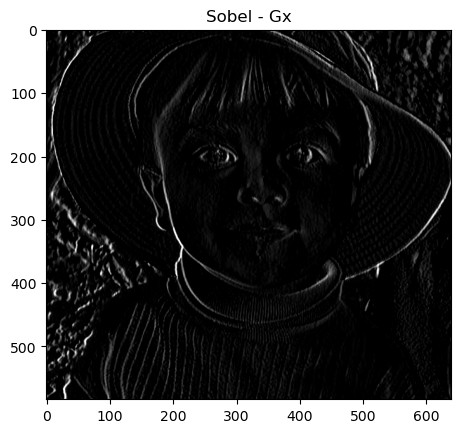

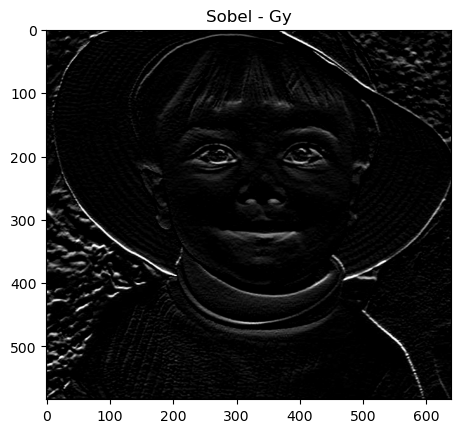

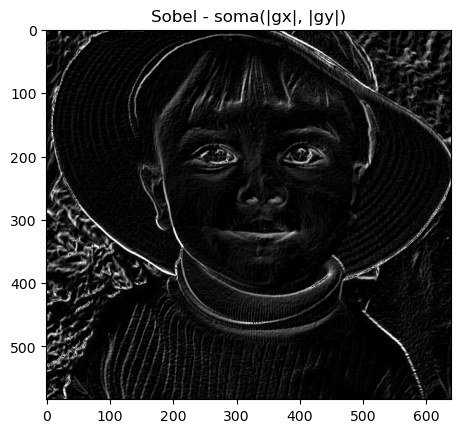

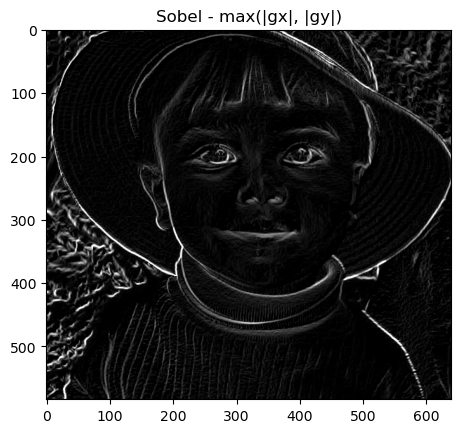

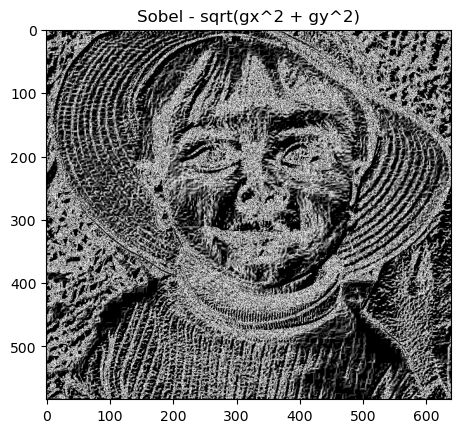

In [7]:
################# COMPLETE O CÓDIGO AQUI  #################
# Crie uma máscara para o gradiente x, y e combinação deles do operador
# de Sobel
# Para fazer a combinação do gradiente de x e y, use: soma, máximo (maximum do numpy) e 
# raiz quadrada (use potencia de 1/2)
# Use a função filter2D para aplicar

def normalizacao(img):
    " Normaliza a imagem entre 0 e 255"
    
    b = 255
    a = 0
    
    img = (b-a)*( (img - np.min(img))/(np.max(img)-np.min(img)) ) + a
    
    img = img.astype(np.uint8)
    
    return img

kernelGx = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])

kernelGy = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])

imgGx = cv2.filter2D(img, ddepth=-1,
                      kernel = kernelGx)

imgGy = cv2.filter2D(img, ddepth=-1,
                      kernel = kernelGy)

# aproximação do gradiente usando soma(|gx|, |gy|)
imgGxy1 = np.abs(imgGx) + np.abs(imgGy)

# aproximação do gradiente usando max(|gx|, |gy|)
imgGxy2 = np.maximum( np.abs(imgGx), np.abs(imgGy) )

# aproximação do gradiente usando sqrt(gx^2 + gy^2)
imgGxy3 = (imgGx**2 + imgGy**2)**(1/2)

# a operação de raiz quadrada gera valores decimais e pode concentrar
# os tons de cinza próximos de 0. Para diminuir o problema, iremos normalizar
imgGxy3 = normalizacao(imgGxy3)

plt.imshow(imgGx, 'gray', vmin=0, vmax=255)
plt.title('Sobel - Gx')
plt.show()

plt.imshow(imgGy, 'gray', vmin=0, vmax=255)
plt.title('Sobel - Gy')
plt.show()

plt.imshow(imgGxy1, 'gray', vmin=0, vmax=255)
plt.title('Sobel - soma(|gx|, |gy|)')
plt.show()

plt.imshow(imgGxy2, 'gray', vmin=0, vmax=255)
plt.title('Sobel - max(|gx|, |gy|)')
plt.show()

plt.imshow(imgGxy3, 'gray', vmin=0, vmax=255)
plt.title('Sobel - sqrt(gx^2 + gy^2)')
plt.show()

Outra maneira de aplicar os operadores de Sobel é por meio da função Sobel.
- src: imagem
- ddepth: quantidade de bits em cada pixel. Use -1 para manter a mesma configuração da imagem de entrada
- dx: use 1 para indicar se deverá ser calculado o gradiente de x. Ou use 0 para não calcular
- dy: use 1 para indicar se deverá ser calculado o gradiente de y. Ou use 0 para não calcular
- ksize: tamanho do kernel. O padrão é 3.

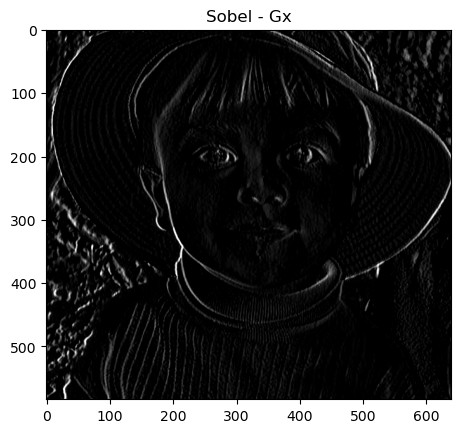

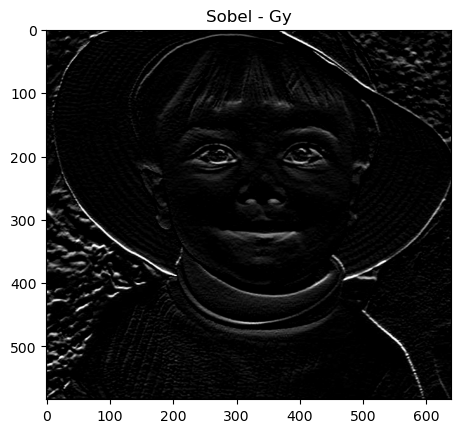

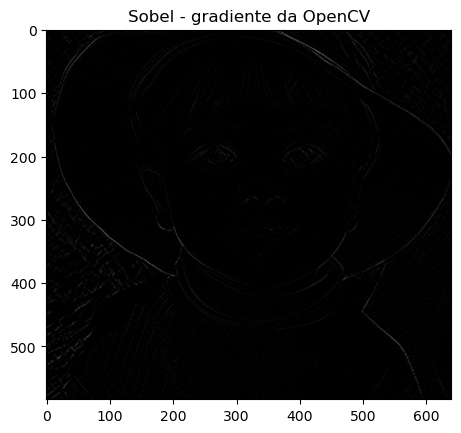

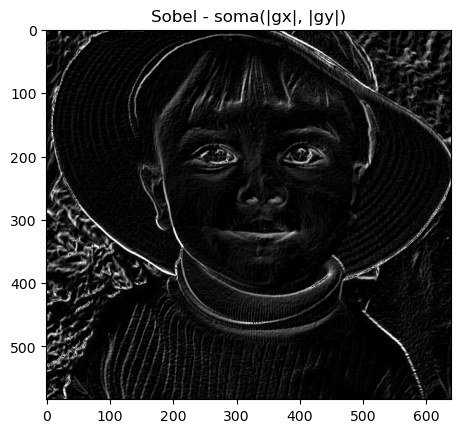

In [8]:
################# COMPLETE O CÓDIGO AQUI  #################
# Use a função Sobel para calcular os gradientes x, y e combinação deles
#
# Faça a combinação de x e y usando o operador Sobel e também fazendo a soma

imgGx = cv2.Sobel( img, ddepth=-1,
                 dx = 1, dy = 0, ksize=3)

imgGy = cv2.Sobel( img, ddepth=-1,
                 dx = 0, dy = 1, ksize=3)

imgGxy1 = cv2.Sobel( img, ddepth=-1,
                 dx = 1, dy = 1, ksize=3)

imgGxy2 = np.abs(imgGx) + np.abs(imgGy)

plt.imshow(imgGx, 'gray', vmin=0, vmax=255)
plt.title('Sobel - Gx')
plt.show()

plt.imshow(imgGy, 'gray', vmin=0, vmax=255)
plt.title('Sobel - Gy')
plt.show()

plt.imshow(imgGxy1, 'gray', vmin=0, vmax=255)
plt.title('Sobel - gradiente da OpenCV')
plt.show()

plt.imshow(imgGxy2, 'gray', vmin=0, vmax=255)
plt.title('Sobel - soma(|gx|, |gy|)')
plt.show()


Use o operador de Sobel na terceira imagem e use para trocar a cor de fundo. 

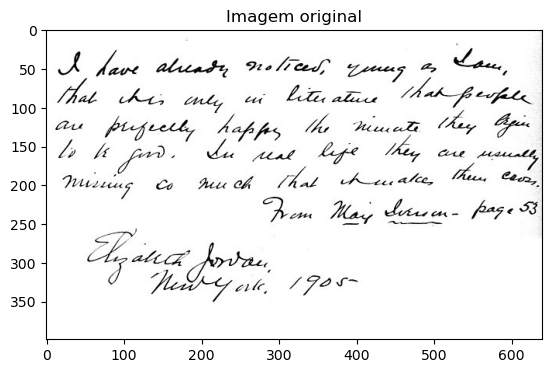

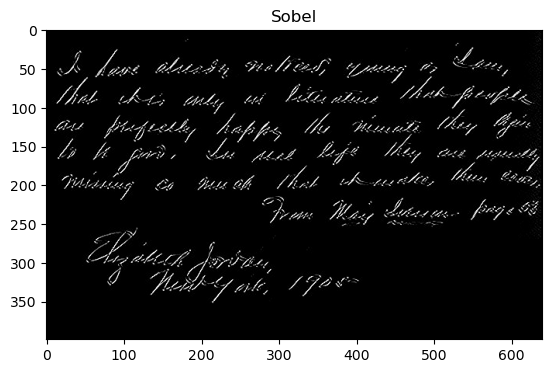

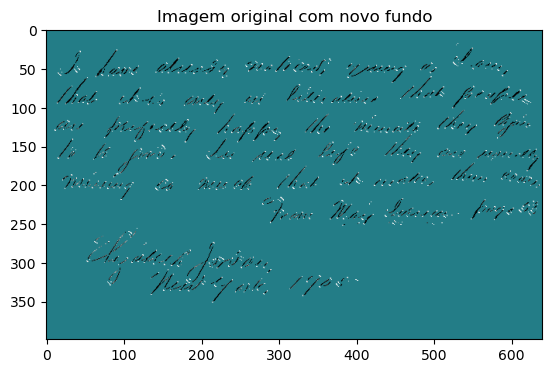

In [9]:
img = cv2.imread('figs/img3.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

################# COMPLETE O CÓDIGO AQUI  #################
# Crie uma mascara que converta todas as regiões que não sejam borda
# para alguma outra cor

imgGxy1 = cv2.Sobel( img, ddepth=-1,
                 dx = 1, dy = 1, ksize=3)

limiar = 150
mascara = ((imgGxy1[:,:,0]<limiar) & 
           (imgGxy1[:,:,1]<limiar) &
           (imgGxy1[:,:,2]<limiar) )
        
img2 = img.copy()

img2[ mascara,: ] = [35,125,135]

plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.title('Imagem original')
plt.show()

plt.imshow(imgGxy1, 'gray', vmin=0, vmax=255)
plt.title('Sobel')
plt.show()

plt.imshow(img2, 'gray', vmin=0, vmax=255)
plt.title('Imagem original com novo fundo')
plt.show()


## Operadores de Prewitt

0
255


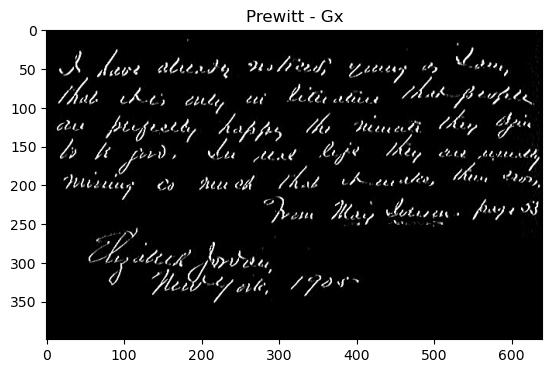

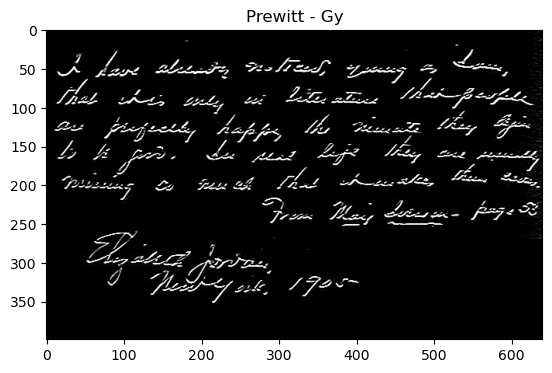

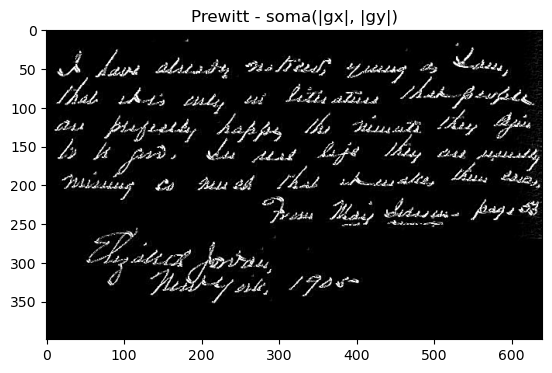

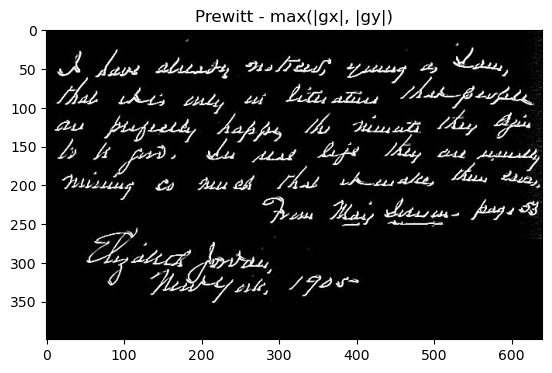

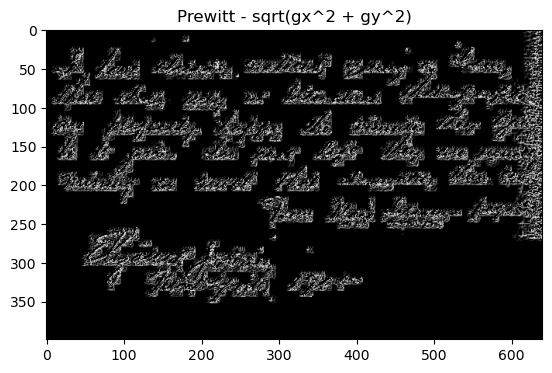

In [10]:
################# COMPLETE O CÓDIGO AQUI  #################
# Crie uma máscara para o gradiente x, y e combinação deles do operador
# de Prewitt
# Para fazer a combinação do gradiente de x e y, use: soma, máximo e raiz quadrada
# Use a função filter2D para aplicar

kernelGx = np.array([[-1,0,1],
                     [-1,0,1],
                     [-1,0,1]])

kernelGy = np.array([[-1,-1,-1],
                     [0,0,0],
                     [1,1,1]])

imgGx = cv2.filter2D(img, ddepth=-1,
                      kernel = kernelGx)

imgGy = cv2.filter2D(img, ddepth=-1,
                      kernel = kernelGy)

imgGxy1 = np.abs(imgGx) + np.abs(imgGy)

imgGxy2 = np.maximum( np.abs(imgGx), np.abs(imgGy) )

imgGxy3 = (imgGx**2 + imgGy**2)**(1/2)
imgGxy3 = normalizacao(imgGxy3)

print(np.min(imgGxy3))
print(np.max(imgGxy3))

plt.imshow(imgGx, 'gray', vmin=0, vmax=255)
plt.title('Prewitt - Gx')
plt.show()

plt.imshow(imgGy, 'gray', vmin=0, vmax=255)
plt.title('Prewitt - Gy')
plt.show()

plt.imshow(imgGxy1, 'gray', vmin=0, vmax=255)
plt.title('Prewitt - soma(|gx|, |gy|)')
plt.show()

plt.imshow(imgGxy2, 'gray', vmin=0, vmax=255)
plt.title('Prewitt - max(|gx|, |gy|)')
plt.show()

plt.imshow(imgGxy3, 'gray', vmin=0, vmax=255)
plt.title('Prewitt - sqrt(gx^2 + gy^2)')
plt.show()

## Operadores de Roberts

0
255


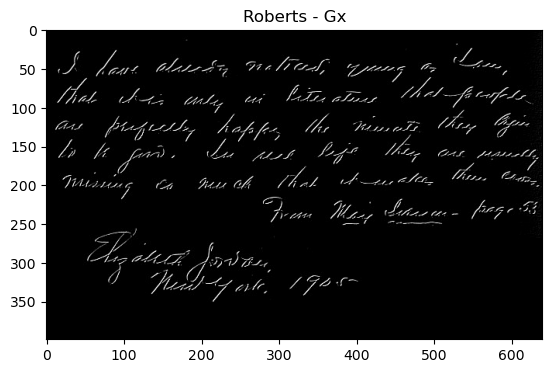

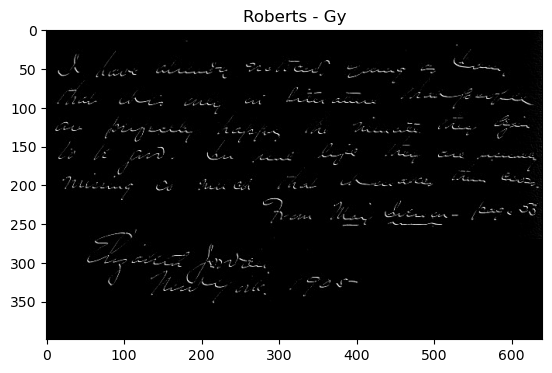

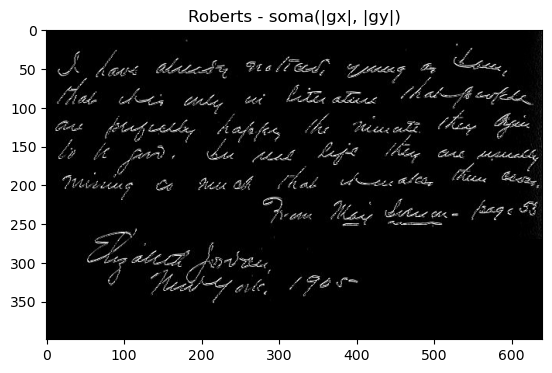

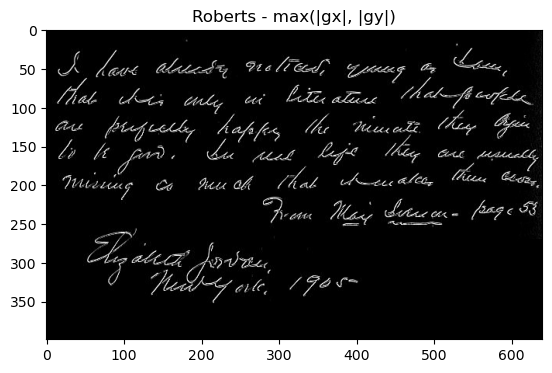

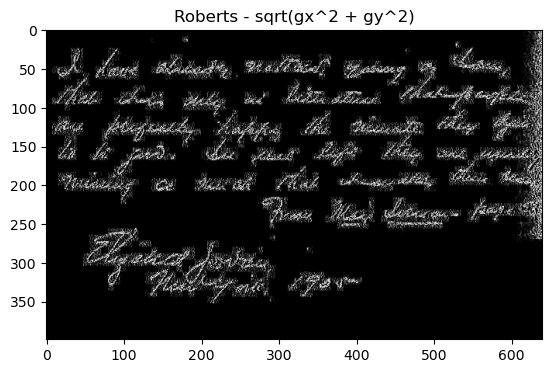

In [11]:
################# COMPLETE O CÓDIGO AQUI  #################
# Crie uma máscara para o gradiente x, y e combinação deles do operador
# de Roberts
# Para fazer a combinação do gradiente de x e y, use: soma, máximo e raiz quadrada
# Use a função filter2D para aplicar
# Corrija os valores negativos usando a função abs do numpy

kernelGx = np.array([[1,0],
                     [0,-1]])

kernelGy = np.array([[0,-1],
                     [1,0]])

imgGx = cv2.filter2D(img, ddepth=-1,
                      kernel = kernelGx)

imgGy = cv2.filter2D(img, ddepth=-1,
                      kernel = kernelGy)

imgGxy1 = np.abs(imgGx) + np.abs(imgGy)

imgGxy2 = np.maximum( np.abs(imgGx), np.abs(imgGy) )

imgGxy3 = (imgGx**2 + imgGy**2)**(1/2)
imgGxy3 = normalizacao(imgGxy3)

print(np.min(imgGxy3))
print(np.max(imgGxy3))

plt.imshow(imgGx, 'gray', vmin=0, vmax=255)
plt.title('Roberts - Gx')
plt.show()

plt.imshow(imgGy, 'gray', vmin=0, vmax=255)
plt.title('Roberts - Gy')
plt.show()

plt.imshow(imgGxy1, 'gray', vmin=0, vmax=255)
plt.title('Roberts - soma(|gx|, |gy|)')
plt.show()

plt.imshow(imgGxy2, 'gray', vmin=0, vmax=255)
plt.title('Roberts - max(|gx|, |gy|)')
plt.show()

plt.imshow(imgGxy3, 'gray', vmin=0, vmax=255)
plt.title('Roberts - sqrt(gx^2 + gy^2)')
plt.show()

Vamos aplicar a segmentação separadamente para cada canal de cor.

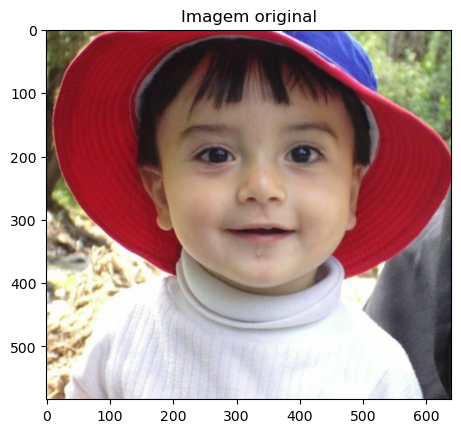

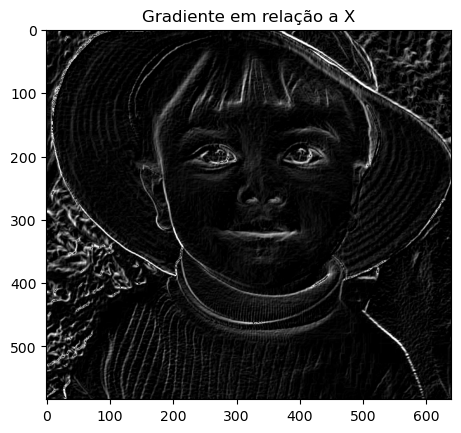

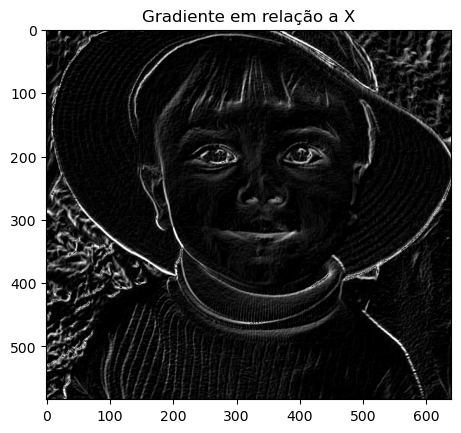

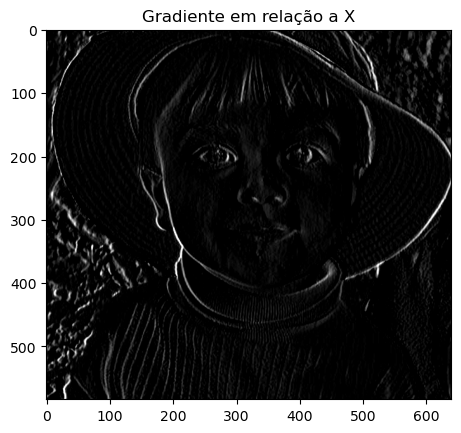

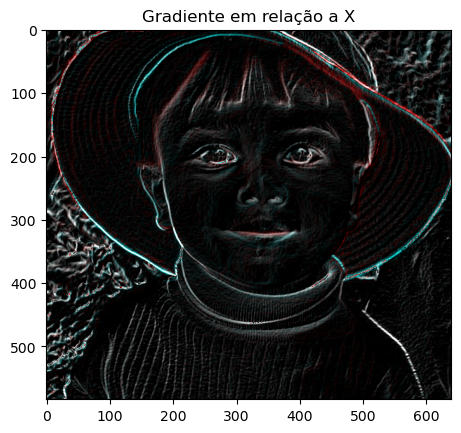

In [12]:
img = cv2.imread('figs/img2.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

################# COMPLETE O CÓDIGO AQUI  #################
# Separe os canais de cores usando a função split  
# Aplique a segmentação em cada canal de cor isoladamente
# Junte os canais usando a função merge

mascX = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

mascY = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

R, G, B = cv2.split(img)

gX_red = cv2.filter2D(R, -1, mascX)
gy_red = cv2.filter2D(R, -1, mascY)
gxy_red = gX_red + gy_red

gX_green = cv2.filter2D(G, -1, mascX)
gy_green = cv2.filter2D(G, -1, mascY)
gxy_green = gX_green + gy_green

gX_blue= cv2.filter2D(G, -1, mascX)
gy_blue = cv2.filter2D(G, -1, mascY)
gxy_blue = gX_blue + gy_blue

imgNew = cv2.merge([gxy_red, gxy_green, gxy_blue])

plt.imshow(img,'gray')
plt.title('Imagem original')
plt.show()

plt.imshow(gxy_red,'gray')
plt.title('Gradiente em relação a X')
plt.show()

plt.imshow(gxy_green,'gray')
plt.title('Gradiente em relação a X')
plt.show()

plt.imshow(gX_blue,'gray')
plt.title('Gradiente em relação a X')
plt.show()

plt.imshow(imgNew,'gray')
plt.title('Gradiente em relação a X')
plt.show()


